In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

# Data Cleaning & Prep

In [5]:
df = df.drop('laptop_ID', axis=1)

In [6]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


# Data Cleaning & Preprocessing

In [8]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [9]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [11]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [12]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [13]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

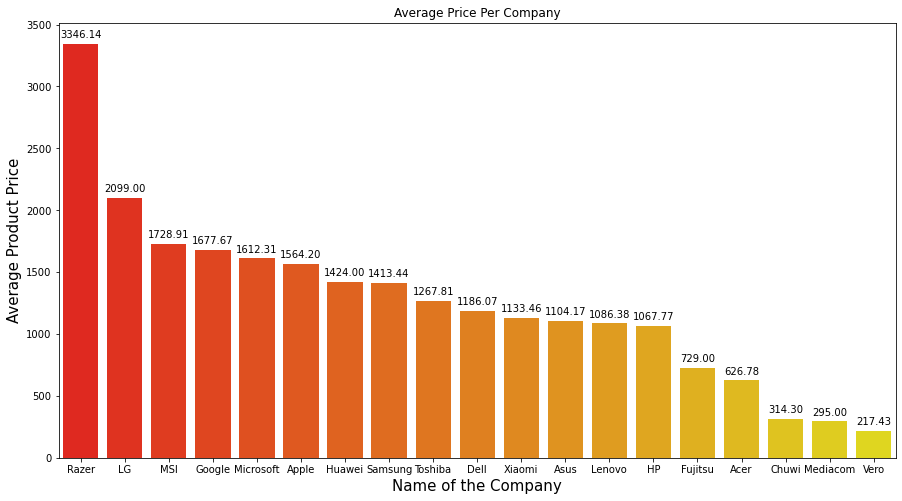

In [14]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

In [15]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Name: Price_euros, dtype: float64

<AxesSubplot:xlabel='Company', ylabel='count'>

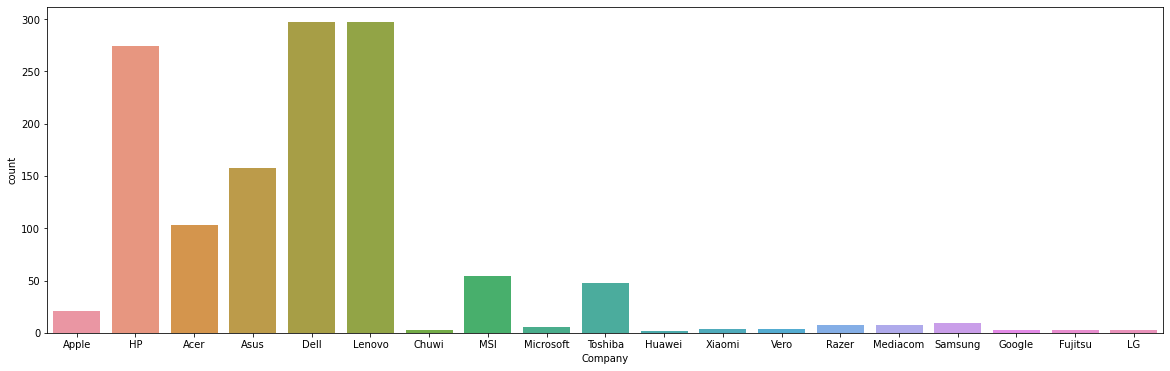

In [16]:
df['Company'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Company", data=df, ax=ax)

# Count Brand Company

In [17]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [18]:
def add_company(a):
    if a == 'Samsung' or a == 'Razer' or a == 'Midiacom' or a == 'Microsoft' or a == 'Xiaomi' or a == 'Vero' or a=='Chuwi' or a=='Google' or a== 'Fujitsu' or a=='LG' or a=='Huawei' or a=='Mediacom': 
        return 'Others'
    else:
        return a

In [19]:
df['Company'] = df['Company'].apply(add_company)

In [20]:
df['Company'].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Others      51
Toshiba     48
Apple       21
Name: Company, dtype: int64

# Count Product

In [21]:
df['Product'].value_counts()

XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: Product, Length: 618, dtype: int64

In [22]:
len(df['Product'].value_counts())

618

# Count TypeName

In [23]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

# Count ScreenResulations

In [24]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [26]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)


# count CPU

In [27]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [28]:
df['cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [29]:
df['cpu_name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [30]:
def set_processor(a):
    if a == 'Intel Core i7' or a=='Intel Core i5' or a=='Intel Core i3':
        return a
    else:
        if a.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Others'

In [31]:
df['cpu_name']=df['cpu_name'].apply(set_processor)

In [32]:
df['cpu_name'].value_counts()

Intel Core i7    527
Intel Core i5    423
Others           155
Intel Core i3    136
AMD               62
Name: cpu_name, dtype: int64

# Count RAM 

In [33]:
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

# Count GPU 

In [34]:
df['Gpu'].value_counts()

Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, Length: 106, dtype: int64

In [35]:
df['gpu_name'] = df['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))

In [36]:
df['gpu_name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_name, dtype: int64

In [37]:
df.shape

(1303, 16)

In [38]:
df = df[df['gpu_name'] != 'ARM']

In [39]:
df.shape

(1302, 16)

In [40]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,Intel


# Now OpSys

In [41]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [42]:
def set_os(a):
    if a == 'Windows 10' or a == 'Windows 7' or a == 'Windows 10 S':
        return 'Windows'
    elif a == 'macOS' or a == 'Mac OS X':
        return 'Mac'
    elif a == 'Linux':
        return a
    else:
        return 'Others'

In [43]:
df['OpSys'] = df['OpSys'].apply(set_os)

In [44]:
df['OpSys'].value_counts()

Windows    1125
Others       94
Linux        62
Mac          21
Name: OpSys, dtype: int64

In [45]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,Intel Core i5,Intel


# Reduce some column

In [46]:
df = df.drop(columns=['Inches', 'Product', 'ScreenResolution', 'Cpu', 'Gpu'])

In [47]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price_euros,Touchscreen,IPS,cpu_name,gpu_name
0,Apple,Ultrabook,8,128GB SSD,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Mac,1.34,898.94,0,0,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,Others,1.86,575.00,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,Mac,1.83,2537.45,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,Mac,1.37,1803.60,0,1,Intel Core i5,Intel


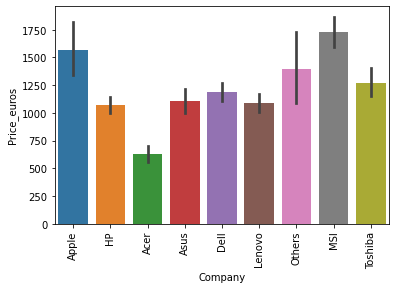

In [48]:
#what is avg price of each brand?

sns.barplot(x=df['Company'], y=df['Price_euros'])

plt.xticks(rotation="vertical")

plt.show()

# One Hot Encoding

In [49]:
df = pd.get_dummies(df)

In [50]:
df.head()

,Ram,Weight,Price_euros,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Others,OpSys_Windows,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Others,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,1339.69,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,8,1.34,898.94,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,8,1.86,575.00,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,16,1.83,2537.45,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,8,1.37,1803.60,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
df.shape

(1302, 71)

# Split Current Data

In [52]:
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Train and Test Data set

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [54]:
X_train.shape, X_test.shape

((976, 70), (326, 70))

# Train the Model

In [55]:
def model_name(model):
    model.fit(X_train,y_train)
    scr = model.score(X_test,y_test)
    print(str(model)+'---->' + str(scr))

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_name(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_name(lasso)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
model_name(knr)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_name(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_name(rf)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model_name(gbr)


LinearRegression()---->0.7378333768302142
Lasso()---->0.7434891734632333
KNeighborsRegressor()---->0.7353541520818712
DecisionTreeRegressor()---->0.6882605819549873
RandomForestRegressor()---->0.7880202251853445
GradientBoostingRegressor()---->0.808263912453423


In [66]:
# to prediction accuracy and interpretability using LASSO regression analysis method 
# that performs both variable selection and regularization 

# Hyperparameter tunning

In [60]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' :[10, 50, 100], 'criterion' : ['squared_error','absolute_error','poisson']}
grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_model = grid_fit.best_estimator_
best_model.score(X_test, y_test)


0.7894880692248988

In [61]:
X_test.columns

Index(['Ram', 'Weight', 'Touchscreen', 'IPS', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Others', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Memory_1.0TB HDD', 'Memory_1.0TB Hybrid', 'Memory_128GB Flash Storage',
       'Memory_128GB HDD', 'Memory_128GB SSD', 'Memory_128GB SSD +  1TB HDD',
       'Memory_128GB SSD +  2TB HDD', 'Memory_16GB Flash Storage',
       'Memory_16GB SSD', 'Memory_180GB SSD', 'Memory_1TB HDD',
       'Memory_1TB HDD +  1TB HDD', 'Memory_1TB SSD',
       'Memory_1TB SSD +  1TB HDD', 'Memory_240GB SSD',
       'Memory_256GB Flash Storage', 'Memory_256GB SSD',
       'Memory_256GB SSD +  1.0TB Hybrid', 'Memory_256GB SSD +  1TB HDD',
       'Memory_256GB SSD +  256GB SSD', 'Memory_256GB SSD +  2TB HDD',
       'Memory_256GB SSD +  500GB HDD',